In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the data 
df = pd.read_csv("customer_shopping_data.csv",index_col=0)

#printing out the first 5 rows of the dataframe
df.head()
#resetting the index of the dataframe
df.reset_index(inplace=True)
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [3]:
#checking out the shape of the dataframe
df.shape

(99457, 10)

In [4]:
#printing out the columns 
df.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')

In [5]:
#checking out for more info about the various columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [6]:
#checking out for any null values
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [7]:
#more information on the statistics of the dataframe
df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [8]:
#checking out the data type of the invoice date 
df['invoice_date'].dtype 


dtype('O')

In [9]:
#printing out the first 5 rows of the invoice date column
df['invoice_date'].head()

0      5/8/2022
1    12/12/2021
2     9/11/2021
3    16/05/2021
4    24/10/2021
Name: invoice_date, dtype: object

In [10]:
#checking for the number of unique values in the invoice date column
df['invoice_date'].nunique()

797

In [11]:
#converting the invoice date column into a date column
df['invoice_date'] = pd.to_datetime(df['invoice_date'],errors ='coerce')
df['invoice_date'].head()

0   2022-05-08
1   2021-12-12
2   2021-09-11
3   2021-05-16
4   2021-10-24
Name: invoice_date, dtype: datetime64[ns]

In [12]:
#checking for the number of unique values in each column
for col in df.columns:
    print(col,df[col].nunique())

invoice_no 99457
customer_id 99457
gender 2
age 52
category 8
quantity 5
price 40
payment_method 3
invoice_date 797
shopping_mall 10


In [13]:
#checking out for duplicates
df.loc[df.duplicated()] # there are no duplicates
#checking for duplicates based on the invoice no,customer_id and invoice date
df.loc[df.duplicated(subset=['invoice_no','customer_id','invoice_date'])] #none
df.loc[df.duplicated(subset=['invoice_no','invoice_date'])] #none 
df.duplicated().sum()

0

In [14]:
#printing out the columns
df.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')

In [15]:
#checking if every element in the invoice number column starts with an I
def check_invoice_no(series):
    condition = series.apply(lambda x:x.startswith("I") and x[1:].isdigit() and len(x)==7)
    return condition.all()

result = check_invoice_no(df['invoice_no'])
result

True

In [16]:
#checking the customber id (must start with C and 6 digit integer)
def check_customer_id(series):
    condition = series.apply(lambda x:x.startswith("C") and x[1:].isdigit() and len(x)== 7)
    return condition.all()
result = check_customer_id(df['customer_id'])
result

True

In [17]:
#looking at the category column (unique values)
df['category'].unique()

array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
       'Toys', 'Technology', 'Souvenir'], dtype=object)

In [18]:
#looking at the payment method column (unique values)
df['payment_method'].unique()

array(['Credit Card', 'Debit Card', 'Cash'], dtype=object)

In [19]:
#CHECKING OUT FOR OUTLIERS IN NUMERIC COLUMNS
df.columns


Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')

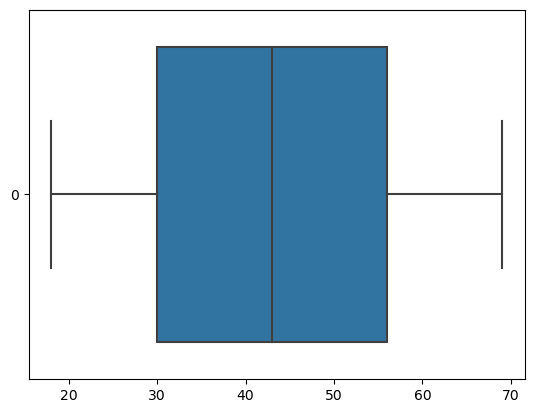

In [20]:
#age column outliers
sns.boxplot(df['age'],orient='h')
plt.show() # age has no outliers found

<Axes: >

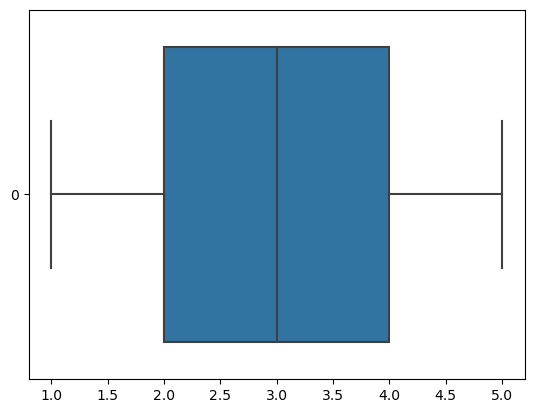

In [21]:
#quantity column
sns.boxplot(df['quantity'],orient='h') # no outliers found

<Axes: >

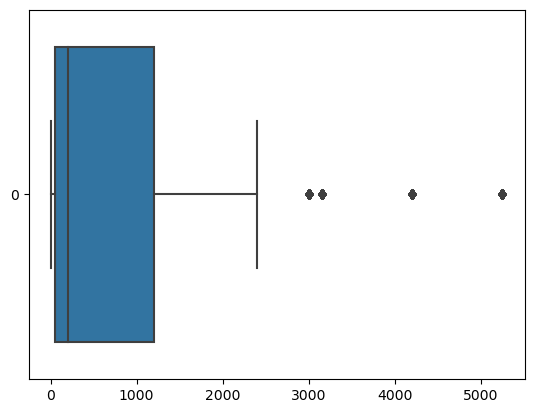

In [22]:
#price column outliers
sns.boxplot(df['price'],orient ='h') # there exists some outliers in the price column

<Axes: >

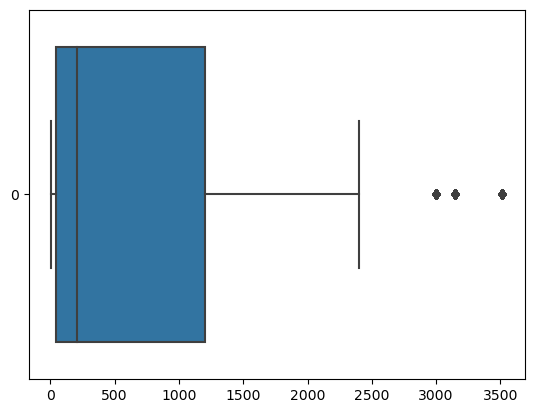

In [23]:
#using capping to remove the outliers
upper_limit = df['price'].mean() + 3 * df['price'].std()
lower_limit = df['price'].mean() - 3 * df['price'].std()

df.loc[df['price'] > upper_limit,'price'] = upper_limit
df.loc[df['price'] < lower_limit,'price'] = lower_limit

# print(lower_limit,upper_limit)
sns.boxplot(df['price'],orient ='h')

2932.625
-1686.8549999999998


<Axes: >

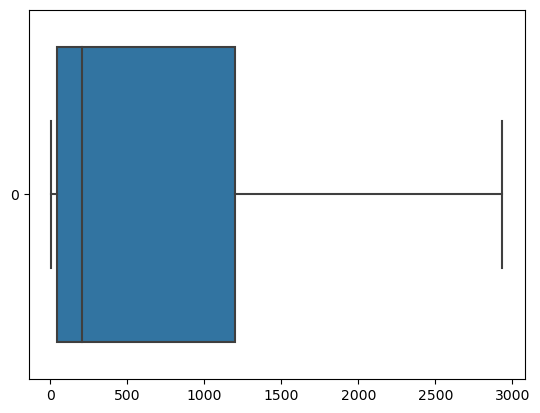

In [24]:
#handling the remaining outliers using the interquartile range method
#finding the interquartile range
q1 = df['price'].quantile(0.25)
q2 = df['price'].quantile(0.75)

q3 = q2 - q1 # calculating the interquartile range

new_upper_limit = q2 + (1.5 * q3)
new_lower_limit = q1 - (1.5 * q3)

print(new_upper_limit)
print(new_lower_limit)
df['price'] = df['price'].clip(lower = new_lower_limit,upper=new_upper_limit)
sns.boxplot(df['price'],orient ='h') #done with all outliers

<Axes: xlabel='price', ylabel='Density'>

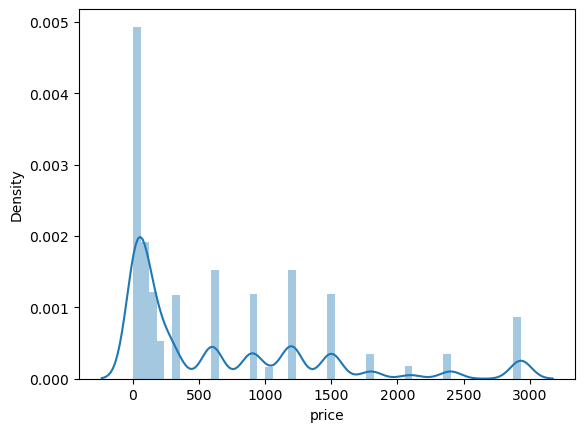

In [25]:
#price column histogram
sns.distplot(df['price']) # it is right skewed 

In [26]:
df.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')

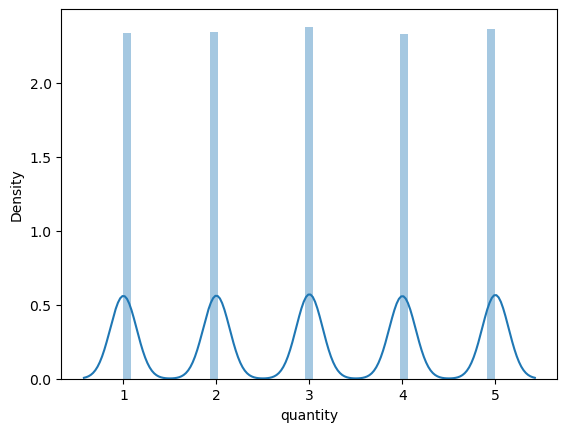

In [27]:
#quantity column
sns.distplot(df['quantity']) # it is periodic
plt.show()

<Axes: >

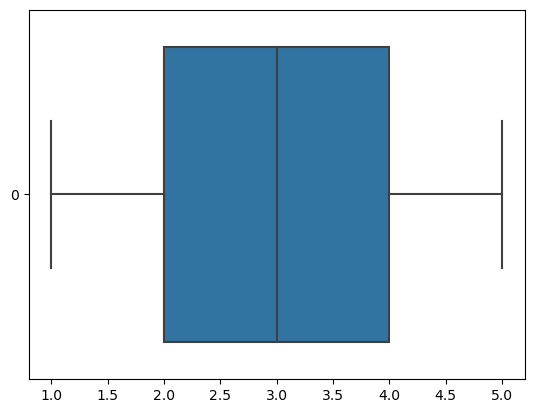

In [28]:
#checking for outliers in the the quantity column
sns.boxplot(df['quantity'],orient='h') #no outliers found

# Exploratory Data Analysis


In [29]:
#Univariate analysis - single variable analysis
#finding the std deviation,the mean,median and mode in terms of the age,price and quantity
df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,649.590907
std,14.990054,1.413025,797.179372
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,2932.625000


In [30]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.400,Credit Card,2022-05-08,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.510,Debit Card,2021-12-12,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.080,Cash,2021-09-11,Metrocity
3,I173702,C988172,Female,66,Shoes,5,2932.625,Credit Card,2021-05-16,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.600,Cash,2021-10-24,Kanyon


In [31]:
#performing univariate analysis for each column

for col in df.columns:
    print(f"Univariate Statistics for {col}")
    
    print(df[col].describe())
    print("\n")

Univariate Statistics for invoice_no
count       99457
unique      99457
top       I138884
freq            1
Name: invoice_no, dtype: object


Univariate Statistics for customer_id
count       99457
unique      99457
top       C241288
freq            1
Name: customer_id, dtype: object


Univariate Statistics for gender
count      99457
unique         2
top       Female
freq       59482
Name: gender, dtype: object


Univariate Statistics for age
count    99457.000000
mean        43.427089
std         14.990054
min         18.000000
25%         30.000000
50%         43.000000
75%         56.000000
max         69.000000
Name: age, dtype: float64


Univariate Statistics for category
count        99457
unique           8
top       Clothing
freq         34487
Name: category, dtype: object


Univariate Statistics for quantity
count    99457.000000
mean         3.003429
std          1.413025
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.

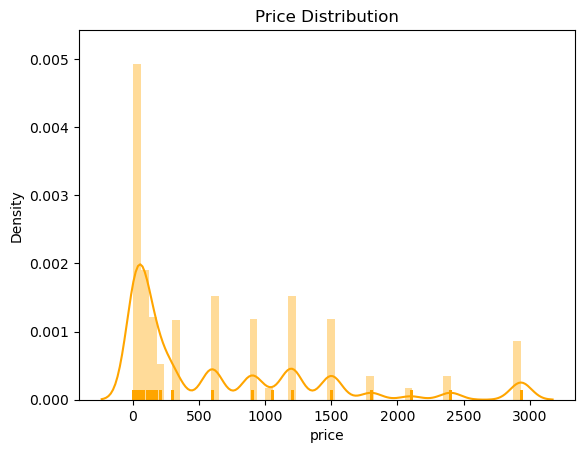

In [32]:
#creating histograms for the numeric variables
#price 
sns.distplot(df['price'],rug=True,color='orange')
plt.title('Price Distribution')
plt.show()

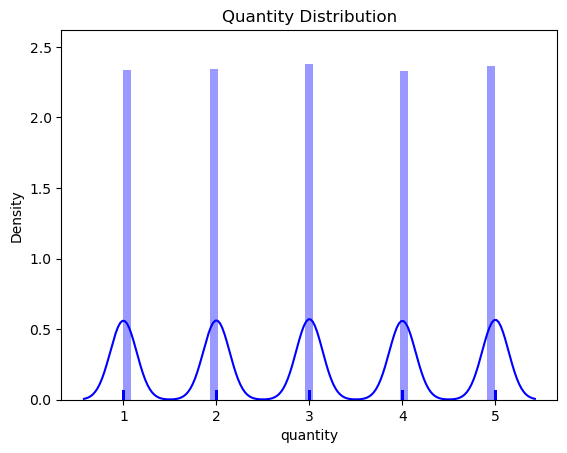

In [33]:
#quantity distplot
sns.distplot(df['quantity'],rug=True,color='blue')
plt.title("Quantity Distribution")
plt.show()

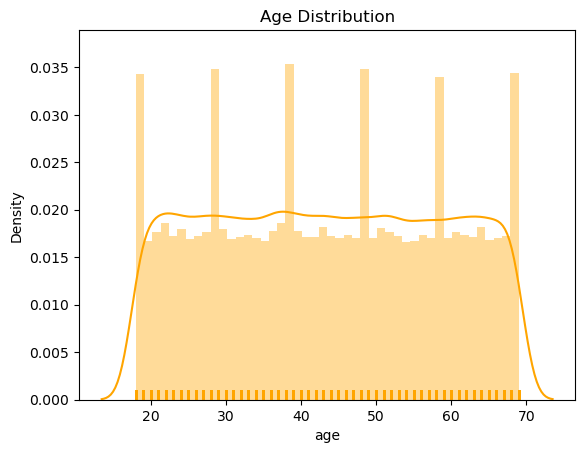

In [34]:
#age distribution
sns.distplot(df['age'],rug=True,color='orange')
plt.title('Age Distribution')
plt.show()

In [35]:
#calculating the skewness of the age
from scipy.stats import skew,kurtosis
skewness = df['age'].skew()
skewness

0.009021024595102008

In [36]:
#calculating the kurtosis of the age
from scipy.stats import kurtosis
raw = kurtosis(df['age'],fisher = False)
excess  = kurtosis(df['age'],fisher = True)
print(raw,excess)

1.8016461043006458 -1.1983538956993542


# REMARKS


I conducted univariate analysis for each variable to understand its characteristics individual.
The invoice_no and the customer_id's were unique and none of them was duplicated
There were no null values for all the variables 
Gender distribution : noted that most of the buyers were women 
and most frequently bought category was clothing
Most of the customers opted for Cash as the method of payment 
In regards to the most frequently preferred mall by the customers,Mall of Instabull stood out with the majority
Most of the sales occurred on 24/11/2021,aligning with the festive/peak season
The oldest person to make a purchase was a 69 year old 

Visualization
From the visualizations using seaborn's distplot,I observed that the quantity distribution was periodic/ seasonal indicating variations in purchasing behaviour over time 
The price distribution was right skewed meaning that most buyers made purchases for items of low price 

The age distribution displot showed that the distribution of the age was approximately symmetric showing a diverse distribution of ages among the buyers 
The kurtosis analysis supplemented my observation that the ages were more distributed and not concentrated in one place

Moving on to perfom bivariate and multivariate analysis to understand the relationships between the various variables

<Axes: >

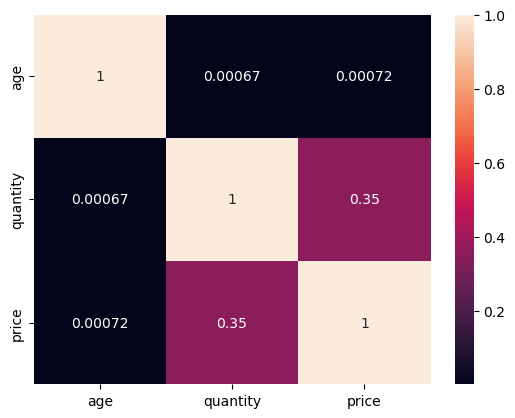

In [37]:
#Bivariate analysis
#relationship between various variables using a heatmap()
sns.heatmap(df.corr(),annot=True)

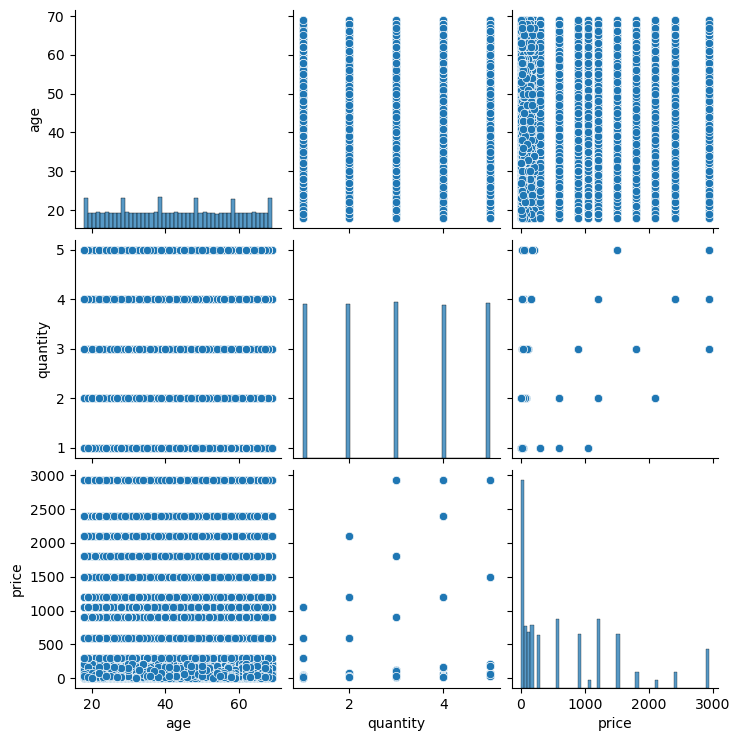

In [38]:
sns.pairplot(df)

0.03804445240362044 647.9387474021822 0.0007153827708894528 0.8215078311278191 0.16863178570251022


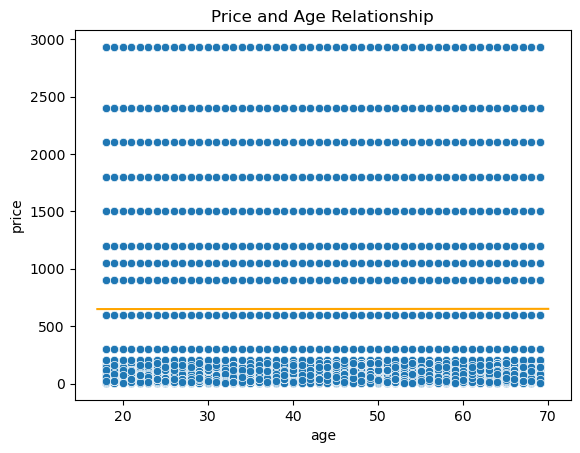

In [39]:
from scipy.stats import linregress
#creating a linear regression between age and price
#y = mx + c
m,c,r,p,err = linregress(df.age,df.price)
# print(m,c,r,p,err,istderr)
print(m,c,r,p,err)
x = range(df.age.min()- 1,df.age.max()+2)
y = m * (x) + c
plt.plot(x,y,color='orange')
sns.scatterplot(x= df['age'],y= df['price']) 
plt.title("Price and Age Relationship")
plt.show()
 #the regression line is very flat hence there is no relationship between  price and age 

6.28408267244756e-05 3.000699623211551 0.0006666458720760124 0.8334833411050762 0.00029890507462338795


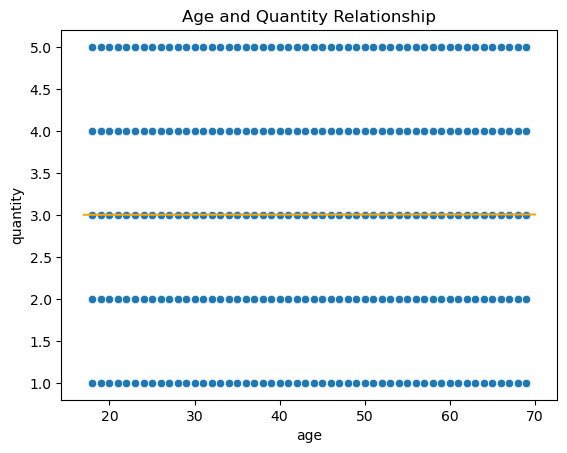

In [40]:
#checking out for the relationship between age and quantity
s,i,r,p,err = linregress(df.age,df.quantity)
print(s,i,r,p,err)
#y = mx + c
x = range(df.age.min()-1,df.age.max() + 2)
y = s * (x) + i
plt.plot(x,y,color='orange')
sns.scatterplot(x = df.age,y = df.quantity)
plt.title("Age and Quantity Relationship")
plt.show()
#there is no relationship between age and quantity

198.64999470725422 52.95982827761395 0.35211327001510667 0.0 1.6743603627765564


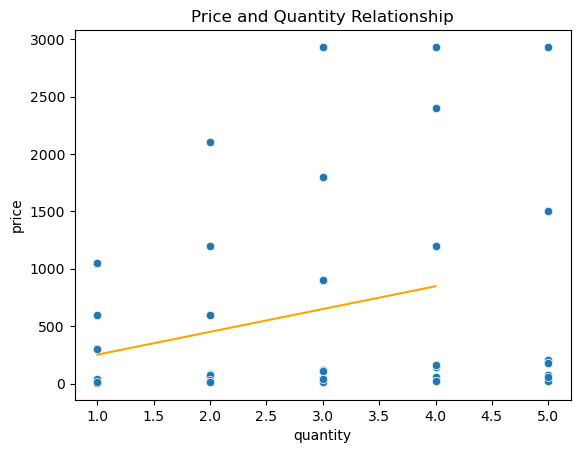

In [41]:
#relationship between quantity and price
slope,intercept,rval,pval,stderr = linregress(df.quantity,df.price)
print(slope,intercept,rval,pval,stderr)
#y = mx + c
x = range(df.quantity.min(),df.quantity.max())
y = slope * (x) + intercept
plt.plot(x,y,color = 'orange')
sns.scatterplot(x = df.quantity,y = df.price)
plt.title("Price and Quantity Relationship")
plt.show() 

# price and quantity have a positive relationship  
#as the quantity increases the price also increases 

In [42]:
#numerical/categorical analysis
#one way anova analysis

#grouping my data by groups 
#female vs male
groups = df.groupby('gender').agg({'quantity':'mean'})
groups

,quantity
gender,
Female,3.003581
Male,3.003202


NULL HYPOTHESIS : The mean of the two groups is the same 
ALTERNATIVE HYPOTHESIS:The mean of the two groups is not the same

<Axes: xlabel='gender', ylabel='quantity'>

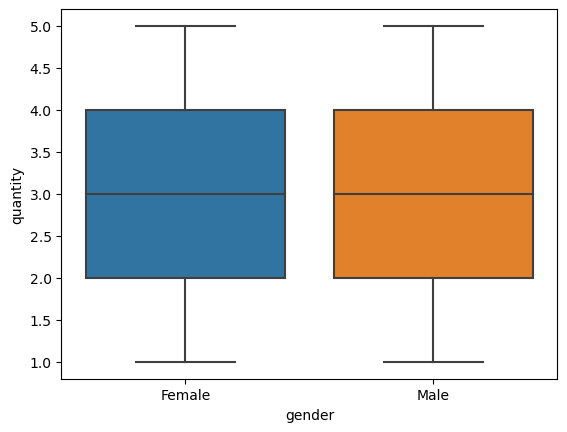

In [43]:
#using boxplot to group
sns.boxplot(x='gender', y='quantity', data=df)

In [44]:
from scipy.stats import f_oneway
grouped_data = df.groupby('gender')['quantity'].apply(list).to_list()
fstats,p_val = f_oneway(*grouped_data)
print(fstats)
print(p_val)  # there is not enough evidence to reject the null hypothesis hence there is no variance in the mean of quantities of the two groups

0.00171915808410049
0.9669270866169034


In [45]:
df.columns
df['price'].head()

0    1500.400
1    1800.510
2     300.080
3    2932.625
4      60.600
Name: price, dtype: float64

In [46]:
#groping based on the shopping mall and price 
df.groupby('shopping_mall').agg({'price':'mean'})

,price
shopping_mall,
Cevahir AVM,645.859635
Emaar Square Mall,660.438113
Forum Istanbul,640.191741
Istinye Park,649.730208
Kanyon,649.659911
Mall of Istanbul,654.278407
Metrocity,644.636465
Metropol AVM,647.341594
Viaport Outlet,651.291374


NULL HYPOTHESIS:The mean of the prices based on the shopping mall is the same
ALTERNATIVE HYPOTHESIS;The mean of the prices based on the shopping mall is the same

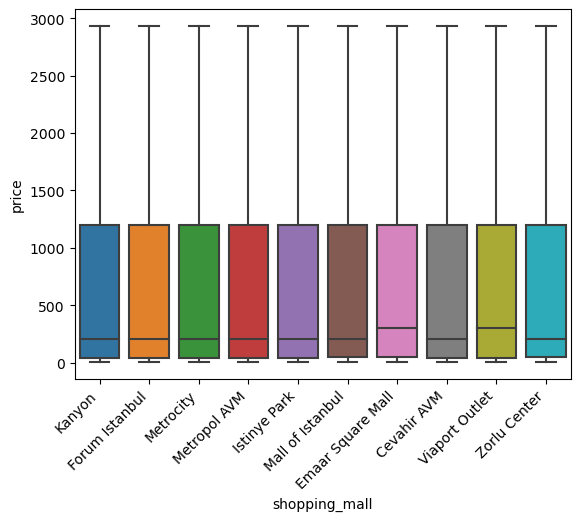

In [47]:
#Creating a boxplot to visualize
sns.boxplot(x=df['shopping_mall'],y=df['price'],data = df)
plt.xticks(rotation=45, ha='right')
plt.show()

In [48]:
mall_data = df.groupby('shopping_mall')['price'].apply(list).to_list()
fstat,pvalue = f_oneway(*mall_data)
print(fstats,pvalue)
if  pvalue < 0.05:
    print('reject the null hypothesis')
else:
    print("accept the null hypothesis")

0.00171915808410049 0.9614364887535579
accept the null hypothesis


In [49]:
df.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')

In [50]:
df['category'].nunique()
df.category.unique()

array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
       'Toys', 'Technology', 'Souvenir'], dtype=object)

In [51]:
df.groupby('category').agg({'price':'mean'})

,price
category,
Books,45.568621
Clothing,901.084021
Cosmetics,122.448626
Food & Beverage,15.671948
Shoes,1793.701412
Souvenir,34.894345
Technology,2394.792609
Toys,107.733185


NULL HYPOTHESIS:The mean of prices for various categories is the same
ALTERNATIVE HYPOTHESIS:The mean of prices for various categories is not the same

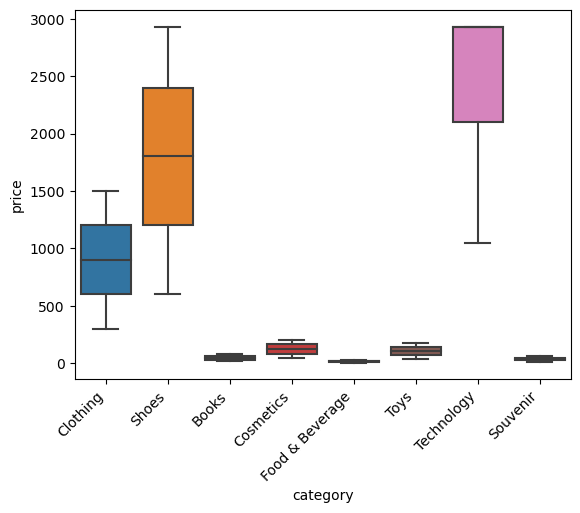

In [52]:
#plotting the boxplots
sns.boxplot(x=df['category'],y=df['price'])
plt.xticks(rotation=45, ha='right')
plt.show()

In [57]:
category_d = df.groupby('category')['price'].apply(list).to_list()
category_d
f_c,pval = f_oneway(*category_d)
print(f_c,pval)

if  pval < 0.05:
    print("reject the null hypothesis")
else:
    print("accept the null hypothesis")

42370.37796409051 0.0
reject the null hypothesis


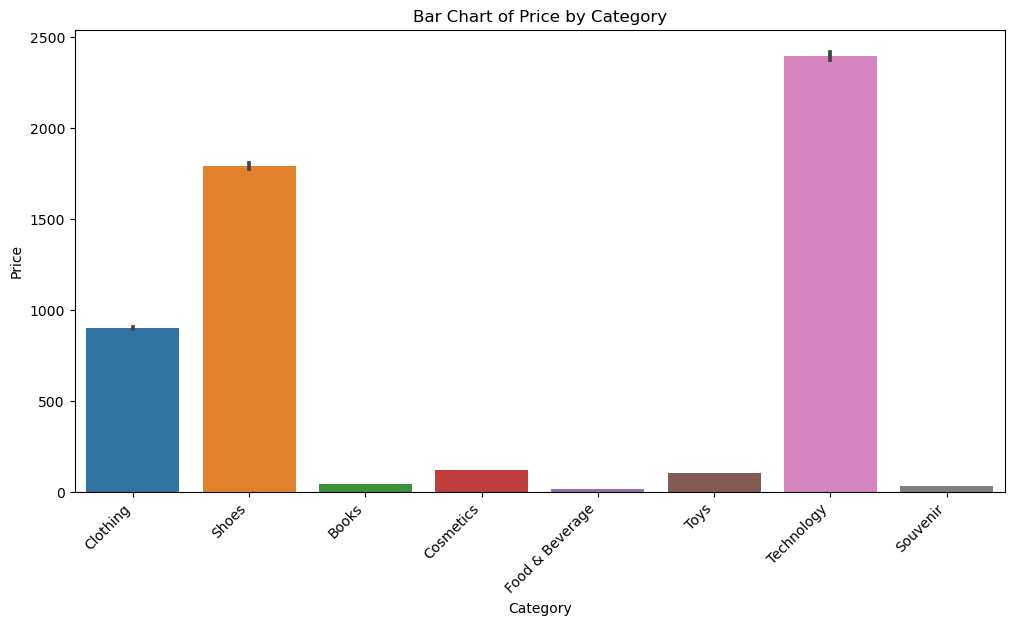

In [54]:
#plotting a bar chart for category and price
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
sns.barplot(x='category', y='price', data=df)
plt.xlabel('Category')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.title('Bar Chart of Price by Category')
plt.show()

In [64]:
#category by categry analysis
result = pd.crosstab(df['shopping_mall'], df['gender'])
result


gender,Female,Male
shopping_mall,,
Cevahir AVM,2940,2051
Emaar Square Mall,2842,1969
Forum Istanbul,3016,1931
Istinye Park,5874,3907
Kanyon,11906,7917
Mall of Istanbul,11902,8041
Metrocity,8941,6070
Metropol AVM,6144,4017
Viaport Outlet,2949,1965


In [80]:
result.sort_values(by=['Female'],ascending=False) #most women prefer kanyon mall

gender,Female,Male
shopping_mall,,
Kanyon,11906,7917
Mall of Istanbul,11902,8041
Metrocity,8941,6070
Metropol AVM,6144,4017
Istinye Park,5874,3907
Forum Istanbul,3016,1931
Zorlu Center,2968,2107
Viaport Outlet,2949,1965
Cevahir AVM,2940,2051


In [81]:
result.sort_values(by='Male',ascending=False) #we have more males going to the mall of istanbul

gender,Female,Male
shopping_mall,,
Mall of Istanbul,11902,8041
Kanyon,11906,7917
Metrocity,8941,6070
Metropol AVM,6144,4017
Istinye Park,5874,3907
Zorlu Center,2968,2107
Cevahir AVM,2940,2051
Emaar Square Mall,2842,1969
Viaport Outlet,2949,1965


In [75]:
#payment method and gender
results_p = pd.crosstab(df['payment_method'],df['gender'])


gender,Female,Male
payment_method,,
Cash,26509,17938
Credit Card,21011,13920
Debit Card,11962,8117


In [85]:
#payment method and shopping mall
results_s = pd.crosstab(df['shopping_mall'],df['payment_method'])
results_s

payment_method,Cash,Credit Card,Debit Card
shopping_mall,,,
Cevahir AVM,2228,1779,984
Emaar Square Mall,2114,1696,1001
Forum Istanbul,2183,1750,1014
Istinye Park,4436,3422,1923
Kanyon,8853,6916,4054
Mall of Istanbul,8894,7019,4030
Metrocity,6625,5347,3039
Metropol AVM,4559,3521,2081
Viaport Outlet,2231,1721,962


In [86]:
results_s.sort_values(by='Cash',ascending=False)

payment_method,Cash,Credit Card,Debit Card
shopping_mall,,,
Mall of Istanbul,8894,7019,4030
Kanyon,8853,6916,4054
Metrocity,6625,5347,3039
Metropol AVM,4559,3521,2081
Istinye Park,4436,3422,1923
Zorlu Center,2324,1760,991
Viaport Outlet,2231,1721,962
Cevahir AVM,2228,1779,984
Forum Istanbul,2183,1750,1014


In [87]:
#CLOTHING AND shopping mall
pd.crosstab(df['shopping_mall'],df['category'])

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
shopping_mall,,,,,,,,
Cevahir AVM,258,1729,732,772,490,240,256,514
Emaar Square Mall,236,1651,760,692,498,247,263,464
Forum Istanbul,252,1729,770,712,458,261,234,531
Istinye Park,462,3353,1458,1490,1001,515,487,1015
Kanyon,1013,6840,3023,2909,2017,1037,997,1987
Mall of Istanbul,1025,6923,3050,2957,2023,948,1017,2000
Metrocity,752,5268,2265,2244,1457,738,772,1515
Metropol AVM,476,3525,1541,1517,1074,531,464,1033
Viaport Outlet,246,1708,734,733,497,225,256,515


# REMARKS


After performing bivariate analysis on my data,these were some of my findings:

There was a strong relationship between price and quantity variables,meaning that as a quantity of a product increases there is a high possibility that the price will increase

Utilizing seaborn's heatmap,pairplot and scatterplot i was able to note that age/quantity,price/age had not relationship

On conducting Hypotheis testing on the average price for different shopping malls it was notable that the average price was approximately the same for all the shopping malls indicating some level of price parity
The average price of the various categories of goods differed 
 Most women preferred kanyon Mall while most men preferred Mall of istanbull